## Titanic: Machine Learning from Disaster

Although it need not be restated but a brief description of this begginner challenge could be read at Titanic. Data record of each passenger is provided under various columns, represeting features such as 'PassengerId','Name', 'Sex', 'Plcass' etc which constitutes training & test dataset to be further evaluated for predictions on any/unseen data.

Prediction: Survival Prediction, the value of which is 0(if Passenger is dead) or 1(if survived). Survival feature values are provived alongside training dataset to map features to prediction target.

Task is to output Survival predictions corresponding to Titanic test data and save them to a csv file for final submission to kaggle, to evaluate how accurate is one trained machine learning model in matching test prediction labels to true labels.

### Basic imports: Library Packages and tools

In [3]:
#libs for data manipulation
import pandas as pd
import numpy as np

#libs for data visulization & analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#machine learning methods
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Loading training & test dataset to the shelf:

In [7]:
# Just playing with data to visualize it to some extent
df = pd.read_csv('train.csv')
df.shape


(891, 12)

In [9]:
# To see which column misses how many values(passengerID - Count)
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

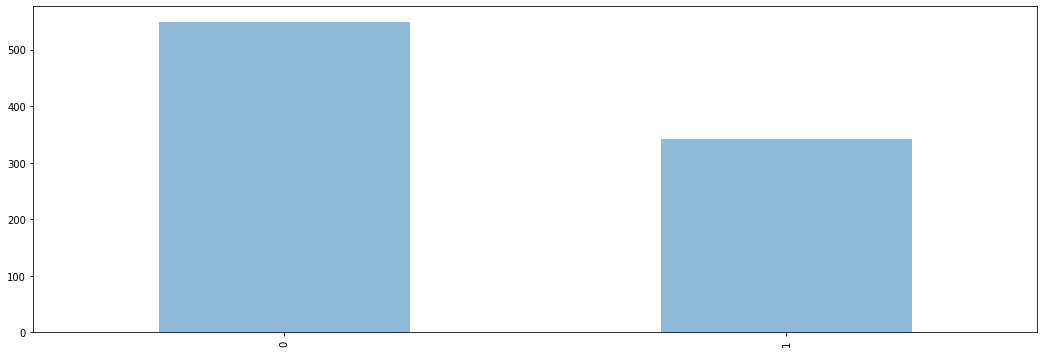

In [17]:
# Plotting to just see some patterns
fig = plt.figure(figsize= (18,6))

df.Survived.value_counts().plot(kind='bar', alpha=0.5)
plt.show()

This plot gives us a rough idea about what percentage of passengers remain alive.

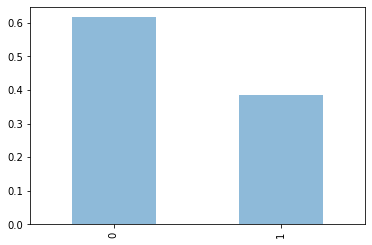

In [18]:
# To get Exact figure in %age:
df.Survived.value_counts(normalize= True).plot(kind='bar', alpha=0.5)
plt.show()

this clearly shows about 40% of passengers survived.

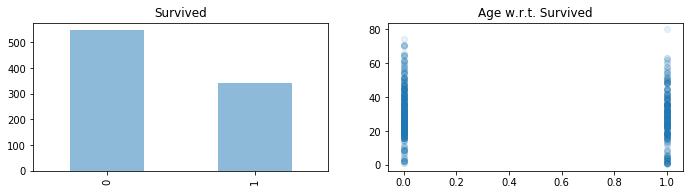

In [20]:
# To get an idea about the relationship between age of pessanger and surviaval
fig = plt.figure(figsize= (18,6))

plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts().plot(kind='bar', alpha=0.5)
plt.title('Survived')

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=0.1)
plt.title('Age w.r.t. Survived')
plt.show()

From these two plots we can assume that younger pessangers survived more w.r.t. older people, but still it can be said with full assurance. So we will try something more to get the idea. May be we will see w.r.t. gender of pessanger.

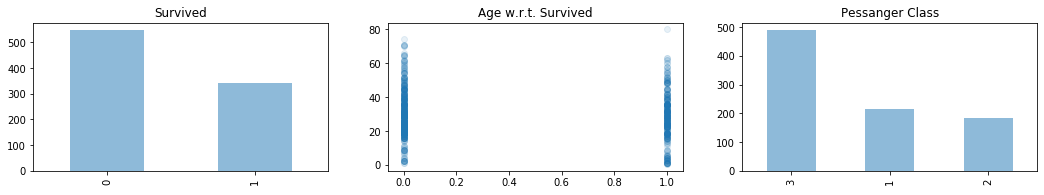

In [21]:
# take a look according to the pessanger class
fig = plt.figure(figsize= (18,6))

plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts().plot(kind='bar', alpha=0.5)
plt.title('Survived')

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=0.1)
plt.title('Age w.r.t. Survived')

plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind='bar', alpha=0.5)
plt.title('Pessanger Class')

plt.show()

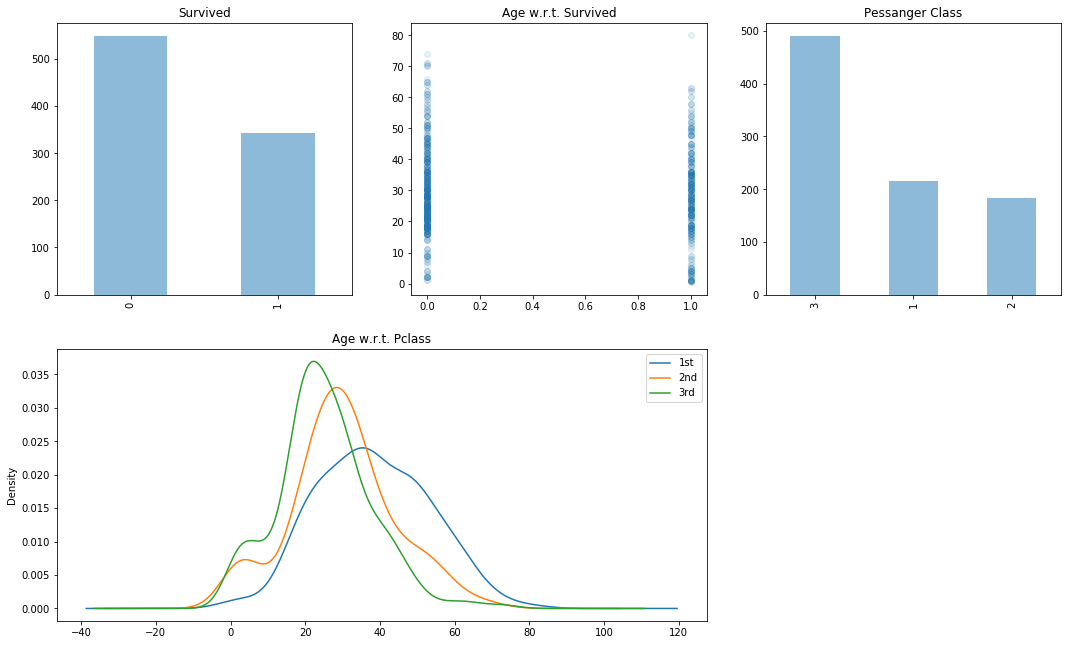

In [23]:
# Now take a look at the Age of Pessanger class wise
fig = plt.figure(figsize= (18,11))

plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts().plot(kind='bar', alpha=0.5)
plt.title('Survived')

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=0.1)
plt.title('Age w.r.t. Survived')

plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind='bar', alpha=0.5)
plt.title('Pessanger Class')

plt.subplot2grid((2,3),(1,0), colspan=2)
for x in [1, 2, 3]:
    df.Age[df.Pclass == x].plot(kind='kde')
plt.title('Age w.r.t. Pclass')
plt.legend(('1st', '2nd', '3rd'))


plt.show()

From the plot it can be said that 1st class pessangers were older(average) w.r.t. 2nd class and 3rd class.

Now one plot for embarking. It will show that from where how many people embarked on ship.

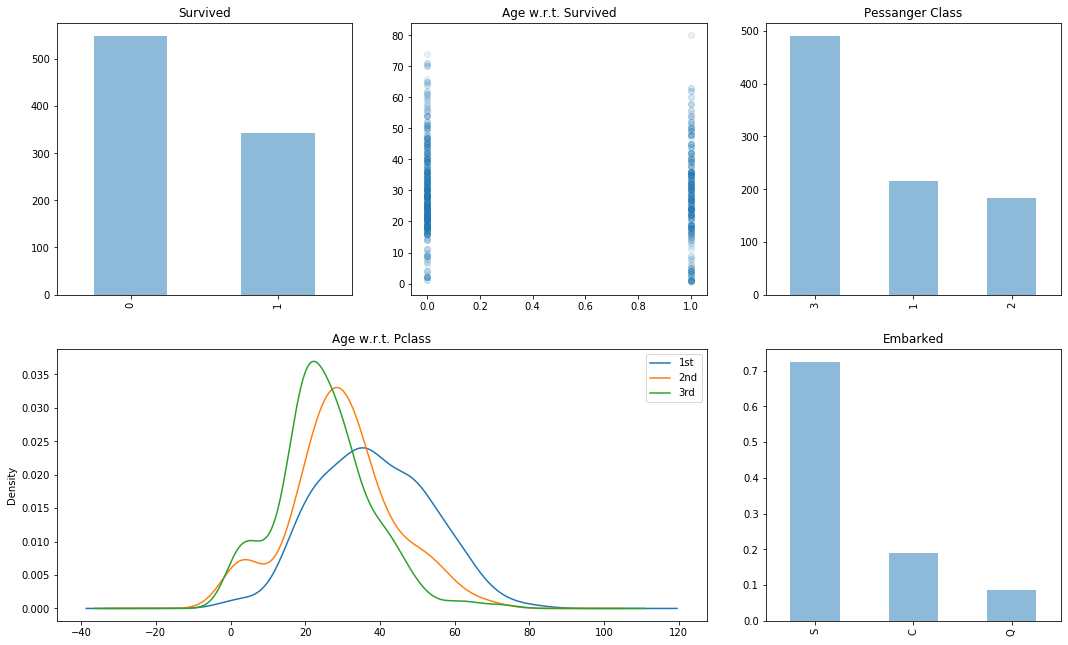

In [30]:
fig = plt.figure(figsize= (18,11))

plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts().plot(kind='bar', alpha=0.5)
plt.title('Survived')

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=0.1)
plt.title('Age w.r.t. Survived')

plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind='bar', alpha=0.5)
plt.title('Pessanger Class')

plt.subplot2grid((2,3),(1,0), colspan=2)
for x in [1, 2, 3]:
    df.Age[df.Pclass == x].plot(kind='kde')
plt.title('Age w.r.t. Pclass')
plt.legend(('1st', '2nd', '3rd'))

plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Embarked')


plt.show()

The embarked plot shows that around 70% pessangers Embarked from England, 20% from France and 10% from Ireland.

#### Now visualize the data according to gender.

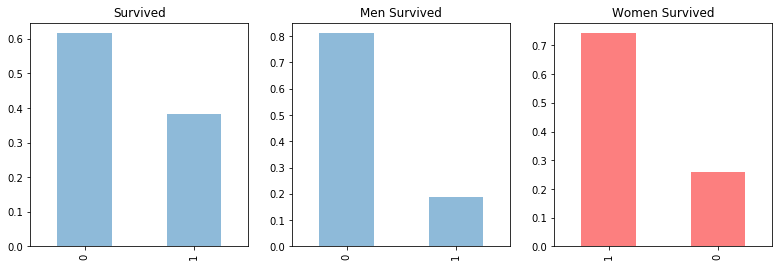

In [32]:
fig = plt.figure(figsize= (18,14))
female_color = "#FA0000"

plt.subplot2grid((3,4),(0,0))
df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Survived')

plt.subplot2grid((3,4),(0,1))
df.Survived[df.Sex=='male'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Men Survived')

plt.subplot2grid((3,4),(0,2))
df.Survived[df.Sex=='female'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=female_color)
plt.title('Women Survived')


plt.show()

From these plots we can see that women survival percentage was above while men survival percentage was below. 

So the line in movie 'Women Children First' was true(on a lighter note)

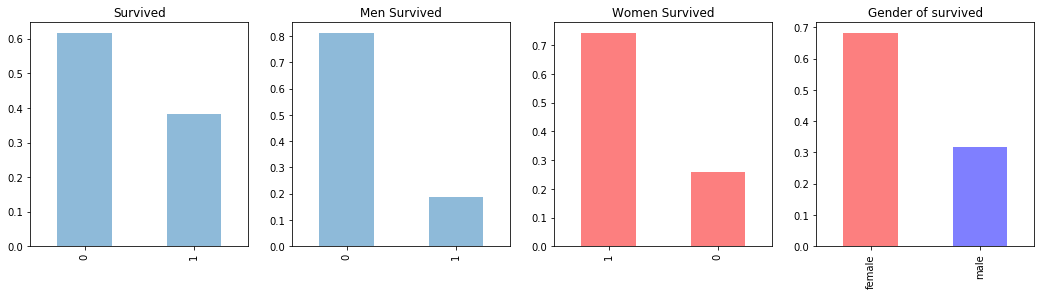

In [33]:
fig = plt.figure(figsize= (18,14))
female_color = "#FA0000"

plt.subplot2grid((3,4),(0,0))
df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Survived')

plt.subplot2grid((3,4),(0,1))
df.Survived[df.Sex=='male'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Men Survived')

plt.subplot2grid((3,4),(0,2))
df.Survived[df.Sex=='female'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=female_color)
plt.title('Women Survived')

plt.subplot2grid((3,4),(0,3))
df.Sex[df.Survived==1].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=[female_color, 'b'])
plt.title('Gender of survived')



plt.show()

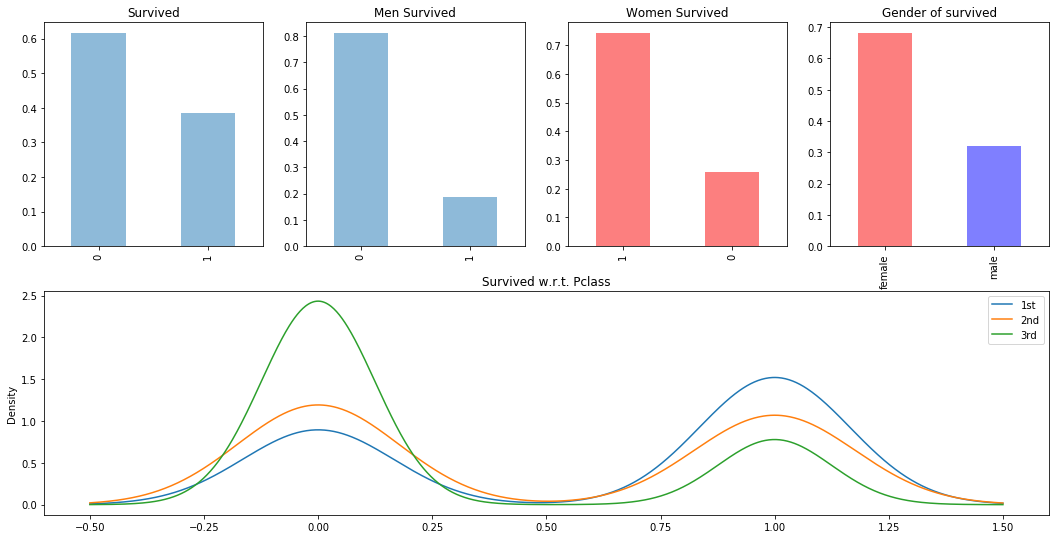

In [34]:
fig = plt.figure(figsize= (18,14))
female_color = "#FA0000"

plt.subplot2grid((3,4),(0,0))
df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Survived')

plt.subplot2grid((3,4),(0,1))
df.Survived[df.Sex=='male'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Men Survived')

plt.subplot2grid((3,4),(0,2))
df.Survived[df.Sex=='female'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=female_color)
plt.title('Women Survived')

plt.subplot2grid((3,4),(0,3))
df.Sex[df.Survived==1].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=[female_color, 'b'])
plt.title('Gender of survived')

plt.subplot2grid((3,4),(1,0), colspan=4)
for x in [1, 2, 3]:
    df.Survived[df.Pclass == x].plot(kind='kde')
plt.title('Survived w.r.t. Pclass')
plt.legend(('1st', '2nd', '3rd'))

plt.show()

From this plot we can see that the 3rd class pessangers died in higher percentage compared to the other classes

Now compare with mixing class with gender then see how it goes.

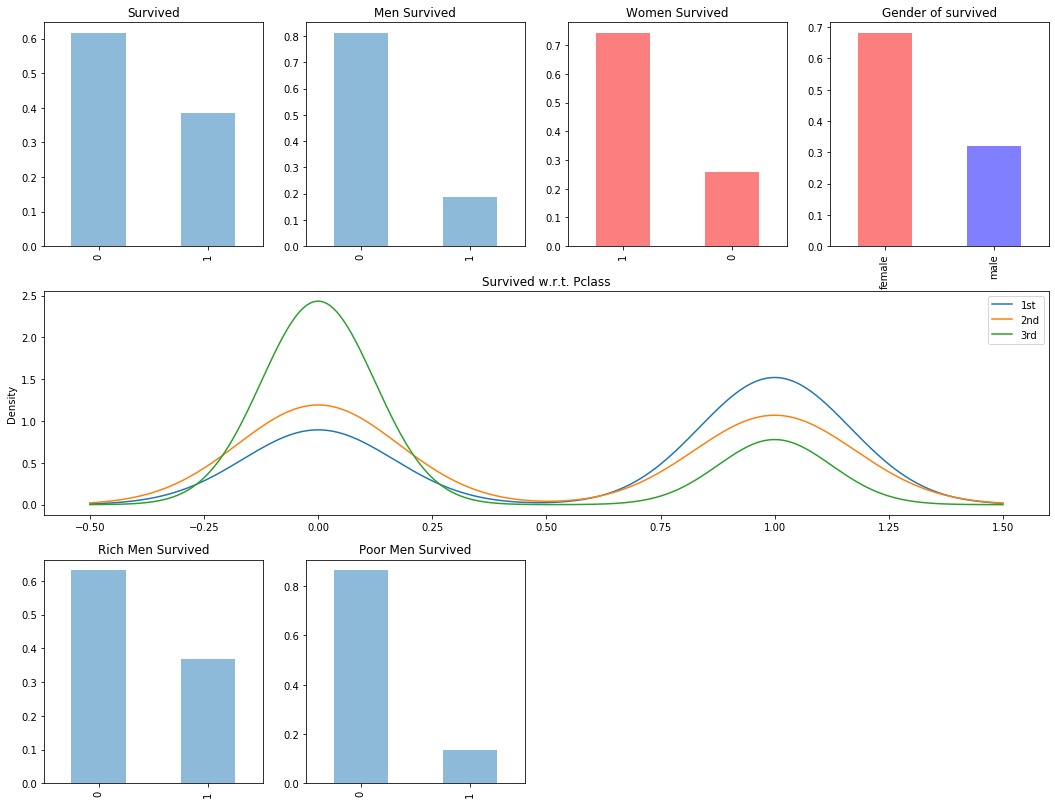

In [35]:
fig = plt.figure(figsize= (18,14))
female_color = "#FA0000"

plt.subplot2grid((3,4),(0,0))
df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Survived')

plt.subplot2grid((3,4),(0,1))
df.Survived[df.Sex=='male'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Men Survived')

plt.subplot2grid((3,4),(0,2))
df.Survived[df.Sex=='female'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=female_color)
plt.title('Women Survived')

plt.subplot2grid((3,4),(0,3))
df.Sex[df.Survived==1].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=[female_color, 'b'])
plt.title('Gender of survived')

plt.subplot2grid((3,4),(1,0), colspan=4)
for x in [1, 2, 3]:
    df.Survived[df.Pclass == x].plot(kind='kde')
plt.title('Survived w.r.t. Pclass')
plt.legend(('1st', '2nd', '3rd'))

plt.subplot2grid((3,4),(2,0))
df.Survived[(df.Sex=='male') & (df.Pclass==1)].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Rich Men Survived')

plt.subplot2grid((3,4),(2,1))
df.Survived[(df.Sex=='male') & (df.Pclass==3)].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Poor Men Survived')



plt.show()

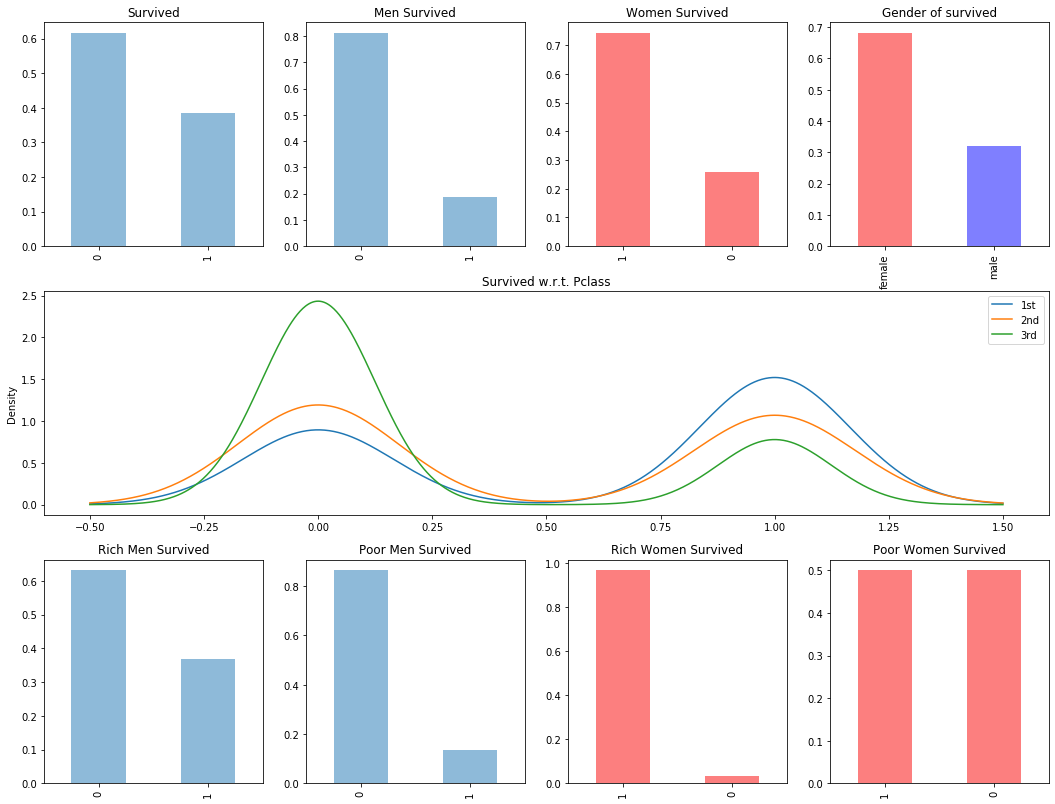

In [36]:
fig = plt.figure(figsize= (18,14))
female_color = "#FA0000"

plt.subplot2grid((3,4),(0,0))
df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Survived')

plt.subplot2grid((3,4),(0,1))
df.Survived[df.Sex=='male'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Men Survived')

plt.subplot2grid((3,4),(0,2))
df.Survived[df.Sex=='female'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=female_color)
plt.title('Women Survived')

plt.subplot2grid((3,4),(0,3))
df.Sex[df.Survived==1].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=[female_color, 'b'])
plt.title('Gender of survived')

plt.subplot2grid((3,4),(1,0), colspan=4)
for x in [1, 2, 3]:
    df.Survived[df.Pclass == x].plot(kind='kde')
plt.title('Survived w.r.t. Pclass')
plt.legend(('1st', '2nd', '3rd'))

plt.subplot2grid((3,4),(2,0))
df.Survived[(df.Sex=='male') & (df.Pclass==1)].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Rich Men Survived')

plt.subplot2grid((3,4),(2,1))
df.Survived[(df.Sex=='male') & (df.Pclass==3)].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Poor Men Survived')

plt.subplot2grid((3,4),(2,2))
df.Survived[(df.Sex=='female') & (df.Pclass==1)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=female_color)
plt.title('Rich Women Survived')

plt.subplot2grid((3,4),(2,3))
df.Survived[(df.Sex=='female') & (df.Pclass==3)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, color=female_color)
plt.title('Poor Women Survived')


plt.show()

With this plot we can clearly see that what were necessary to survive on the ship.

From these things we can decide that the columns which can be used as features are Pclass, Sex, Age, SibSp, Parch, Fare, 
Embarked where as features like pessangerID, Name, Cbin and Ticket are not useful. Survived column will be our label. And along with these we will have to convert string values to numerical values.

In [38]:
dataset = pd.read_csv('train.csv')
train_x = dataset[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]
train_y = dataset['Survived'].values 

testdata= pd.read_csv('test.csv')
test_x= testdata[train_x.columns.values] #makes it same size as train_x column wise

print(dataset.shape, train_x.shape, train_y.shape, test_x.shape)
train_x.head(10) #train_x.head()

(891, 12) (891, 7) (891,) (418, 7)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [39]:
test_x.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


Before being fed to fit a machine learning model, incoming data need to be obliterated with Null, sparesely distributed and inconsitent values, which necessitates Data cleaning as pre-requiste procedure alongside deducing best features which are most representative of the resulting values(Target Variable) via numerical or visual correlation.

In [40]:
print('train data description:')
dataset.info(),
print('\n','test data description:')
test_x.info()

train data description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB

 test data description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)

Therefore there are:

    177 and 86 Null Age values in train & test data respectively
    2 NaNs in Embarked vals from Train data
    687 NaNs in Cabin from Train data
    1 NaN in Fare in test data


#### Distribution of numerical features values across the samples in train dataset

In [41]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Data Munging

In [42]:
#filling correlated age individually to NaNs in train set & test set.
age_fill = [train_x['Age'].median(), test_x['Age'].median()]
train_x['Age'].fillna(age_fill[0], inplace=True)
test_x['Age'].fillna(age_fill[1], inplace=True)

c:\users\my\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)



#### Combining train_x and test_x into single dataframe for ease of feature completion and numerical transformation simultaneoulsy on both sets

    Original shape of train_x is (891,7) and test_x is (418,7)
    after the task is done, both dataframes will be detached again



In [44]:
print(train_x.shape, train_y.shape)
combined = train_x.append(test_x) #[featureset, test_x]
print(type(combined), combined.shape)

(891, 7) (891,)
<class 'pandas.core.frame.DataFrame'> (1309, 7)



#### there is high correlation betweeb Survived and Sex, Females are majorly saved.

Therefore transforming this categorical text feature to numerical equivalents.


In [45]:
fixSex = combined['Sex'].copy().values
fixSex[fixSex == 'male'] = 0  #changing Categorical(Sex) into numerical analogue
fixSex[fixSex == 'female'] = 1 
fixSex.shape

(1309,)

c:\users\my\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\my\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


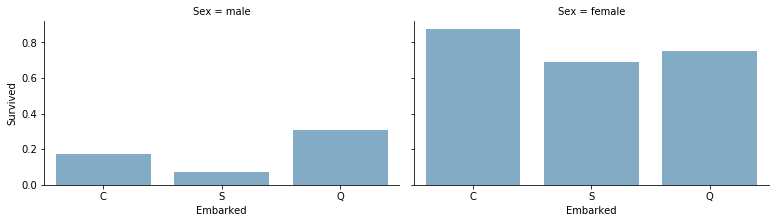

In [46]:
grid = sns.FacetGrid(dataset, col ='Sex', size = 3.2, aspect =1.7)
grid.map(sns.barplot, 'Embarked','Survived', alpha= 0.6, ci = None)


#### Embarked feature also shows high correlation with Sex and also Survived

Therefore filling Empty values in column with the most occuring value 'S', subsequently transforming categorical text values in Embarked to numerical equivalents.


In [47]:
combined['Embarked'].fillna(combined['Embarked'].mode()[0], inplace=True) #filling Null vals in Embarked column
fixEmb = combined['Embarked'].copy().values

fixEmb[fixEmb =='S'] = 0 #changing Embarked into numerical analogue
fixEmb[fixEmb =='C'] = 1
fixEmb[fixEmb =='Q'] = 2
fixEmb.shape

(1309,)

#### Ensuring each colum is complete and non-null now

In [48]:
#combined['Age'].fillna(sum(age_fill)/2, inplace=True) 
combined['Fare'].fillna(combined['Fare'].median(), inplace=True)
combined.info() #all features have non null values now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Fare        1309 non-null float64
Embarked    1309 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 71.6+ KB


#### Replacing Non-numerical feature columns with transformed values

In [49]:
print(combined.shape)
combined.head(15) #dataset before being transformed to wholly numeric

(1309, 7)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,28.0,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


#### Featureset dataframe after all numerical values have been placed

In [50]:
allnum_dataset = combined.copy()
allnum_dataset.loc[:,'Sex'] = fixSex #assigning numeric nd arrays to columns that held string vals.
allnum_dataset.loc[:,'Embarked'] = fixEmb
allnum_dataset.head(15) #after numerical feature transformation

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
5,3,0,28.0,0,0,8.4583,2
6,1,0,54.0,0,0,51.8625,0
7,3,0,2.0,3,1,21.0750,0
8,3,1,27.0,0,2,11.1333,0
9,2,1,14.0,1,0,30.0708,1


#### Slicing trainining features and Test features back into separate variable for Training & evaluating

    shape of X(final Training data) is (891,7)
    shape of test_x(final test data) is (418,7)



In [51]:
X = allnum_dataset.copy()[:891]
test_x=  allnum_dataset.copy()[891:]
X.shape, test_x.shape #final split of training and test data

((891, 7), (418, 7))

### Performing the Train and validation data split for initial accuracy evaluation on first model (SVM)

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X,train_y, test_size = 0.30)
X_train.shape, y_train.shape, X_val.shape, y_val.shape  

((623, 7), (623,), (268, 7), (268,))

## Model initiation, Model training and test Predictions
### SVM- rbf kernel classifier

    classifier initiation & Data fitting
    classifier test data prediction & accuracy
    submission to csv.

Note: Here utilizing training split data for validation first thereafter using complete training dataset for training & submitting target prediction for whole test data for rest of the classifier models.

In [53]:
cla_sv =svm.SVC()# svm kernel = rbf
cla_sv

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [56]:
print("size of training data:","X inputs->", X_train.shape,", y targets-> ", y_train.shape)
cla_sv.fit(X_train, y_train)
print("\n","expected accuracy on solely on training data basis:",cla_sv.score(X_train, y_train))

size of training data: X inputs-> (623, 7) , y targets->  (623,)

 expected accuracy on solely on training data basis: 0.8924558587479936


c:\users\my\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [57]:
print("size of validation test data:","X inputs->", X_val.shape,", y targets-> ", y_val.shape)
y_pred = cla_sv.predict(X_val)
print("\n","expected prediction accuracy:", metrics.accuracy_score(y_val, y_pred))

size of validation test data: X inputs-> (268, 7) , y targets->  (268,)

 expected prediction accuracy: 0.753731343283582


In [58]:
#Now applying RBF kernel SVM on complete training data
print("size of whole training data:","X inputs->", X.shape,", y targets-> ", train_y.shape)
cla_sv.fit(X, train_y)
print("\n","expected accuracy on solely training data basis:", cla_sv.score(X, train_y))

size of whole training data: X inputs-> (891, 7) , y targets->  (891,)


c:\users\my\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 expected accuracy on solely training data basis: 0.8922558922558923


In [59]:
print("size of whole test data:","X inputs->", test_x.shape,  "y targets->", test_x.shape[0])
target_sv = cla_sv.predict(test_x)
submission_sv= pd.DataFrame({'PassengerId':testdata['PassengerId'].values, 'Survived': target_sv})

size of whole test data: X inputs-> (418, 7) y targets-> 418


In [60]:
submission_sv.shape
submission_sv.head(10)
submission_sv.to_csv('submit/submission_sv.csv', index=False)


##### Accuracy for SVM rbf kernel model: 89.22 %
###  SVM- linear kernel classifier

    classifier initiation & Data fitting
    classifier test data prediction & accuracy
    submission to csv.



In [61]:
#Now applying linear kernel SVM on complete training data
cla_linsv =svm.SVC(kernel= 'linear')
print("size of whole training data:","X inputs->", X.shape,", y targets-> ", train_y.shape)
cla_linsv.fit(X, train_y)
print("\n","expected accuracy on solely training data basis:", cla_linsv.score(X, train_y))

size of whole training data: X inputs-> (891, 7) , y targets->  (891,)

 expected accuracy on solely training data basis: 0.7867564534231201


In [62]:
print("size of whole test data:","X inputs->", test_x.shape,  "y targets->", test_x.shape[0])
target_linsv = cla_linsv.predict(test_x)
submission_linsv= pd.DataFrame({'PassengerId':testdata['PassengerId'].values, 'Survived': target_linsv})

size of whole test data: X inputs-> (418, 7) y targets-> 418


In [63]:
print(submission_linsv.shape)
submission_linsv.to_csv('submit/submission_linsv.csv', index=False)

(418, 2)



##### Accuracy for linear SVM model: 78.675 %
### logistic regression classifier

    classifier initiation & Data fitting
    classifier test data prediction & accuracy
    submission to csv.



In [64]:
#Now using logistic regression on complete training data
cla_log= LogisticRegression()
print("size of whole training data:","X inputs->", X.shape,", y targets-> ", train_y.shape)
cla_log.fit(X, train_y)
print("\n","expected accuracy on solely training data basis:", cla_log.score(X, train_y))

size of whole training data: X inputs-> (891, 7) , y targets->  (891,)


c:\users\my\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



 expected accuracy on solely training data basis: 0.7991021324354658


In [65]:
print("size of whole test data:","X inputs->", test_x.shape,  "y targets->", test_x.shape[0])
target_log = cla_log.predict(test_x)
submission_log = pd.DataFrame({'PassengerId':testdata['PassengerId'].values, 'Survived': target_log})

size of whole test data: X inputs-> (418, 7) y targets-> 418


In [66]:
print(submission_log.shape)
submission_log.to_csv('submit/submission_log.csv', index=False)

(418, 2)



##### Accuracy for logistic regression model: 79.910 %
### Decision Tree classifier

    classifier initiation & Data fitting
    classifier test data prediction & accuracy
    submission to csv.



In [67]:
#Now using descision tree on complete training data
cla_dt= DecisionTreeClassifier()
print("size of whole training data:","X inputs->", X.shape,", y targets-> ", train_y.shape)
cla_dt.fit(X, train_y)
print("\n","expected accuracy on solely training data basis:", cla_dt.score(X, train_y))

size of whole training data: X inputs-> (891, 7) , y targets->  (891,)

 expected accuracy on solely training data basis: 0.9797979797979798


In [68]:
print("size of whole test data:","X inputs->", test_x.shape,  "y targets->", test_x.shape[0])
target_dt = cla_dt.predict(test_x)
submission_dt = pd.DataFrame({'PassengerId':testdata['PassengerId'].values, 'Survived': target_dt})

size of whole test data: X inputs-> (418, 7) y targets-> 418


In [69]:
print("results through Decision Tree method", submission_log.shape)
submission_dt.to_csv('submit/submission_dt.csv', index=False)

results through Decision Tree method (418, 2)



##### Accuracy for Decision Trees model: 97.979 %
### Random forest classifier

    classifier initiation & Data fitting
    classifier test data prediction & accuracy
    submission to csv.



In [70]:
#Now using Random forests on complete training data
cla_forest = RandomForestClassifier(n_estimators=100)
print("size of whole training data:","X inputs->", X.shape,", y targets-> ", train_y.shape)
cla_forest.fit(X, train_y)
print("\n","expected accuracy on solely training data basis:", cla_forest.score(X, train_y))

size of whole training data: X inputs-> (891, 7) , y targets->  (891,)

 expected accuracy on solely training data basis: 0.9797979797979798


In [71]:
print("size of whole test data:","X inputs->", test_x.shape,  "y targets->", test_x.shape[0])
target_forest = cla_forest.predict(test_x)
submission_forest = pd.DataFrame({'PassengerId':testdata['PassengerId'].values, 'Survived': target_forest})

size of whole test data: X inputs-> (418, 7) y targets-> 418


In [73]:
print("results random forest method", submission_forest.shape)
submission_forest.to_csv('submit/submission_forest.csv', index=False)

results random forest method (418, 2)


##### Accuracy for random forest model: 97.979 %
### Model evaluation table:

In [74]:
#Model evaluation
models= pd.DataFrame({'Models':['SVM_rbf','SVM_linear','Logistic regression', 'Decision Trees','Random forest'],
                      'Accuracy':[cla_sv.score(X, train_y), cla_linsv.score(X, train_y),cla_log.score(X, train_y),cla_dt.score(X, train_y),
                                  cla_forest.score(X, train_y)]})
models.sort_values(by='Accuracy', ascending= False)

,Models,Accuracy
3,Decision Trees,0.979798
4,Random forest,0.979798
0,SVM_rbf,0.892256
2,Logistic regression,0.799102
1,SVM_linear,0.786756
